In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.set_index("Id", inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

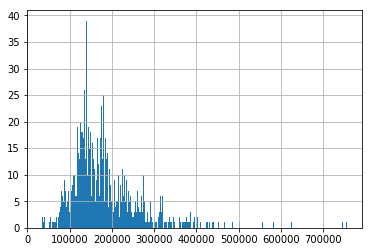

In [13]:
data['SalePrice'].hist(bins=500)

In [37]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [17]:
data_numeric = data.select_dtypes(exclude=['object'])
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [46]:
#calcul des coefficients de correlations entre les variables numériques
table_correlation = data_numeric.corr()


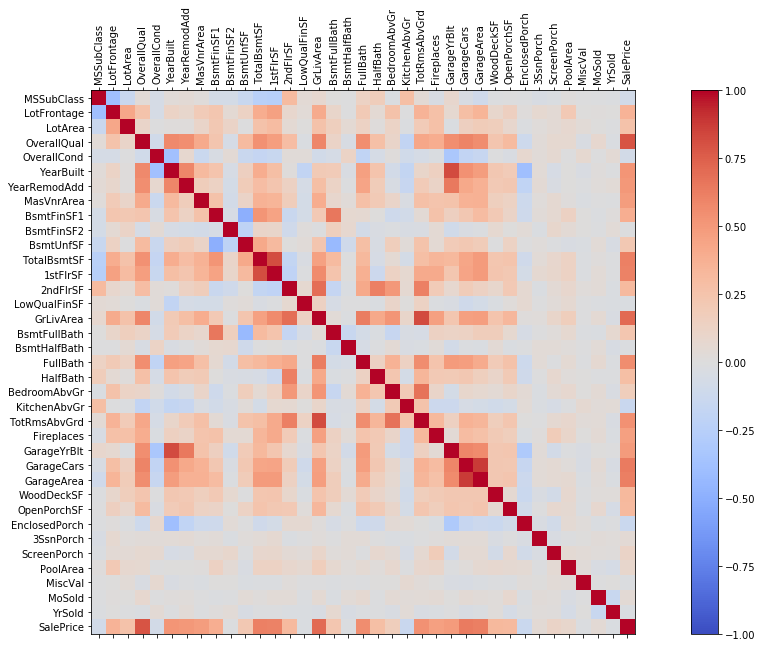

In [24]:
#Représentation graphique des correlations entre les variables numériques

corr = data_numeric.corr()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_numeric.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_numeric.columns)
ax.set_yticklabels(data_numeric.columns)
plt.show()

In [47]:
#Récupération des variables fortement correlée avec le prix de vente
table_correlation[(table_correlation['SalePrice']>0.5) | (table_correlation['SalePrice']<(-0.5))]['SalePrice']

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

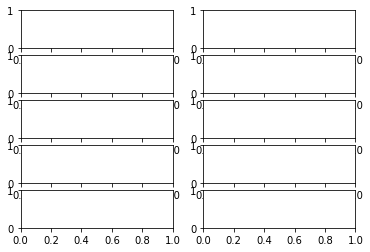

In [54]:
#Représentation graphiques en scatter plot des relations entres Sale Price et les variables d'intérets

fig, ax = plt.subplots(5,2)

x = data_numeric['SalePrice']

ax[0].plot(x,y=data_numeric['OverallQual'])
'''ax[1].plot(x,y=data_numeric['YearBuilt'])
ax[2].plot(x,y=data_numeric['YearRemodAdd'])
ax[3].scatter(x,y=data_numeric['TotalBsmtSF'])
ax[4].scatter(x,y=data_numeric['1stFlrSF'])
ax[5].scatter(x,y=data_numeric['GrLivArea'])
ax[6].scatter(x,y=data_numeric['FullBath'])
ax[7].scatter(x,y=data_numeric['TotRmsAbvGrd'])
ax[8].scatter(x,y=data_numeric['GarageCars'])
ax[9].scatter(x,y=data_numeric['GarageArea'])'''

'''fig, [ax1, ax2] = plt.subplots(1,2)
ax1.plot(x1,x2)
ax1.set_title('LINEAR PLOT')   
ax1.set_xlabel('x label')     
ax1.set_ylabel('y label')   

ax2.plot(x,y)
ax2.set_title('COSINE PLOT')
ax2.set_xlabel('x label')
ax2.set_ylabel('y label')'''

plt.show()



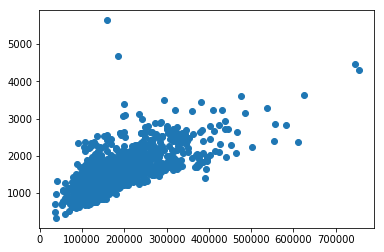

In [36]:



plt.scatter(data_numeric['SalePrice'],data_numeric['LotFrontage'])
plt.scatter(data_numeric['SalePrice'],data_numeric['LotArea'])
plt.scatter(data_numeric['SalePrice'],data_numeric['OverallQual'])
plt.scatter(data_numeric['SalePrice'],data_numeric['OverallCond'])
plt.scatter(data_numeric['SalePrice'],data_numeric['YearBuilt'])
plt.scatter(data_numeric['SalePrice'],data_numeric['YearRemodAdd'])
plt.scatter(data_numeric['SalePrice'],data_numeric['MasVnrArea'])
plt.scatter(data_numeric['SalePrice'],data_numeric['OverallQual'])
plt.scatter(data_numeric['SalePrice'],data_numeric['GrLivArea'])

In [ ]:
data_pivot1 = data.pivot_table(values='SalePrice', columns='MonthLevel', index='tenure', aggfunc='mean')
From there, we call iplot, pass "heatmap" to the kind argument, specify an appropriate colorscale, and then fill in the rest of the arguments. This generates an informative heatmap that looks like the following.

data.iplot(kind='heatmap', colorscale='YlOrRd', xTitle='Tenure', 
           yTitle='Month Level', title='Avg. Churn Rates by Month Level & Tenure')